# Analyze Stony Brook DDA Output

In [18]:
import xarray as xr
import glob
import cmweather

In [6]:
files = sorted(glob.glob("/data/project/ARM_Summer_School_2025/radar/dda/multidop/stonybrook/*"))


In [7]:
files


['/data/project/ARM_Summer_School_2025/radar/dda/multidop/stonybrook/armrkhtxconv.20230401.071733.nc',
 '/data/project/ARM_Summer_School_2025/radar/dda/multidop/stonybrook/armrkhtxconv.20230401.072813.nc',
 '/data/project/ARM_Summer_School_2025/radar/dda/multidop/stonybrook/armrkhtxconv.20230401.074551.nc',
 '/data/project/ARM_Summer_School_2025/radar/dda/multidop/stonybrook/armrkhtxconv.20230401.080334.nc',
 '/data/project/ARM_Summer_School_2025/radar/dda/multidop/stonybrook/armrkhtxconv.20230401.082641.nc']

In [10]:
ds = xr.open_dataset(files[0])
#open mfdataset opens multiple ones 

In [11]:
ds = xr.open_mfdataset(files)


In [12]:
ds


<xarray.Dataset> Size: 129MB
Dimensions:                     (time: 5, z: 31, y: 161, x: 161)
Coordinates:
  * time                        (time) datetime64[ns] 40B 2023-04-01T07:17:33...
  * x                           (x) float32 644B -4e+04 -3.95e+04 ... 4e+04
  * y                           (y) float32 644B -4e+04 -3.95e+04 ... 4e+04
  * z                           (z) float32 124B 0.0 500.0 ... 1.45e+04 1.5e+04
Data variables: (12/13)
    origin_latitude             (time) float32 20B dask.array<chunksize=(1,), meta=np.ndarray>
    origin_longitude            (time) float32 20B dask.array<chunksize=(1,), meta=np.ndarray>
    origin_altitude             (time) float32 20B dask.array<chunksize=(1,), meta=np.ndarray>
    projection                  (time) int32 20B 1 1 1 1 1
    ProjectionCoordinateSystem  (time) int32 20B 1 1 1 1 1
    eastward_wind_component     (time, z, y, x) float32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
    ...                          ...
    vertical_wind_component     (time, z, y, x) float32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
    hydrometeor_fall_speed      (time, z, y, x) float32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
    radar_coverage              (time, z, y, x) int32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
    northward_wind_component    (time, z, y, x) float32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
    radar_network_reflectivity  (time, z, y, x) float32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
    horizontal_wind_divergence  (time, z, y, x) float32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
Attributes: (12/17)
    comment:                        
    process_version:                
    input_datastreams_description:  A string consisting of the datastream(s),...
    input_datastreams:              
    description:                    
    state:                          
    ...                             ...
    project:                        
    facility_id:                    
    references:                     
    institution:                    
    input_datastreams_num:          
    history:                        created by user moue on cumulus.das.bnl.g...

In [13]:
ds["radar_network_reflectivity"]


<xarray.DataArray 'radar_network_reflectivity' (time: 5, z: 31, y: 161, x: 161)> Size: 16MB
dask.array<concatenate, shape=(5, 31, 161, 161), dtype=float32, chunksize=(1, 31, 161, 161), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 40B 2023-04-01T07:17:33.055150270 ... 2023...
  * x        (x) float32 644B -4e+04 -3.95e+04 -3.9e+04 ... 3.95e+04 4e+04
  * y        (y) float32 644B -4e+04 -3.95e+04 -3.9e+04 ... 3.95e+04 4e+04
  * z        (z) float32 124B 0.0 500.0 1e+03 ... 1.4e+04 1.45e+04 1.5e+04

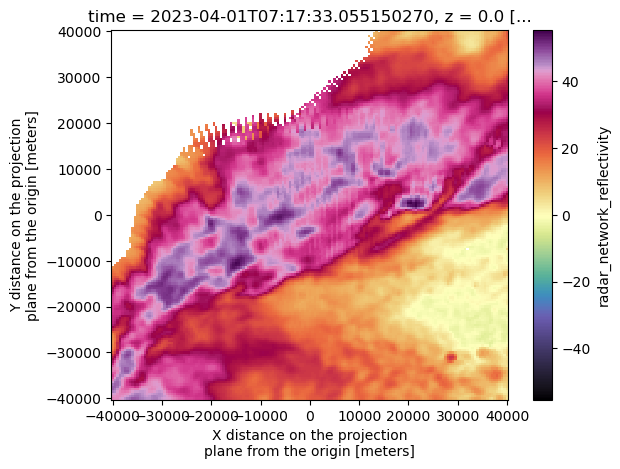

In [19]:
ds["radar_network_reflectivity"].isel(time=0, z=0).plot(cmap="ChaseSpectral")

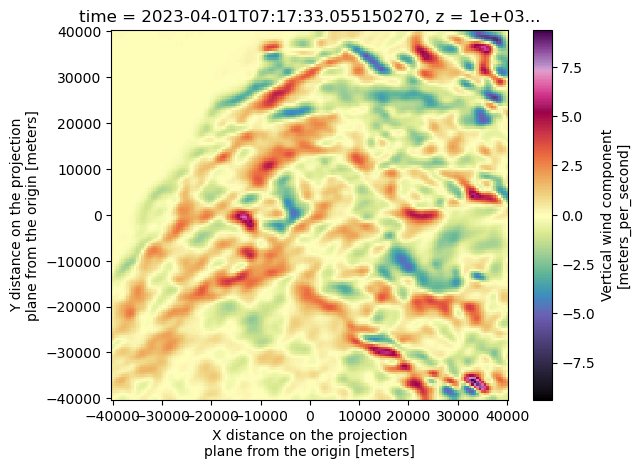

In [23]:
ds["vertical_wind_component"].isel(time=0, z=2).plot(cmap="ChaseSpectral")

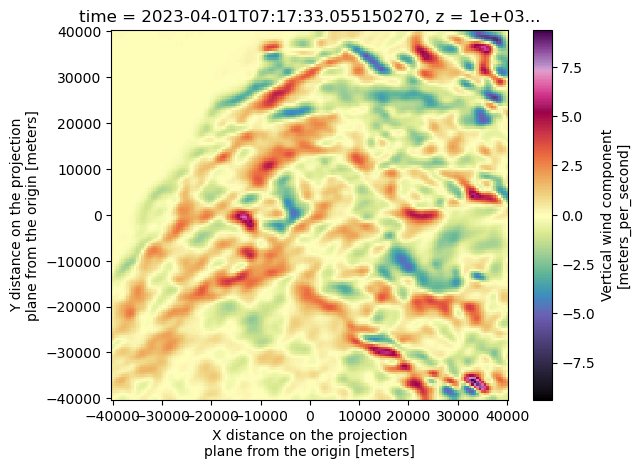

In [24]:
ds["vertical_wind_component"].isel(time=0).sel(z=1_000).plot(cmap="ChaseSpectral")

In [25]:
ds.z


<xarray.DataArray 'z' (z: 31)> Size: 124B
array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,  4000.,
        4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,  8000.,  8500.,
        9000.,  9500., 10000., 10500., 11000., 11500., 12000., 12500., 13000.,
       13500., 14000., 14500., 15000.], dtype=float32)
Coordinates:
  * z        (z) float32 124B 0.0 500.0 1e+03 ... 1.4e+04 1.45e+04 1.5e+04
Attributes:
    long_name:      Z distance on the projection plane from the origin
    units:          meters
    positive:       up
    standard_name:  projection_z_coordinate
    axis:           Z

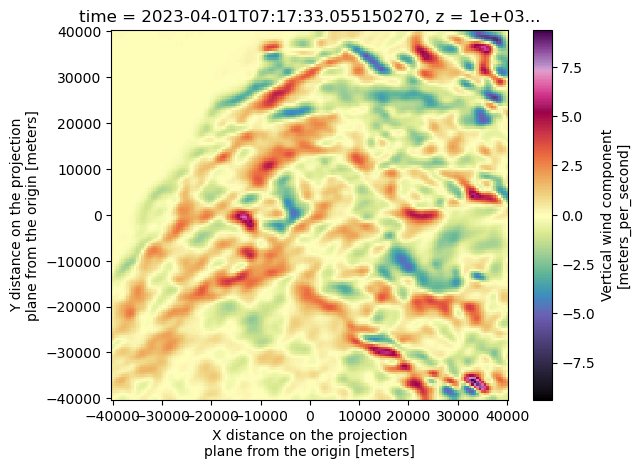

In [28]:
# if you wanted something close to 1200 but didn't know if 1200 was valid and only 1000
ds["vertical_wind_component"].isel(time=0).sel(z=1_200, method="nearest").plot(cmap="ChaseSpectral")

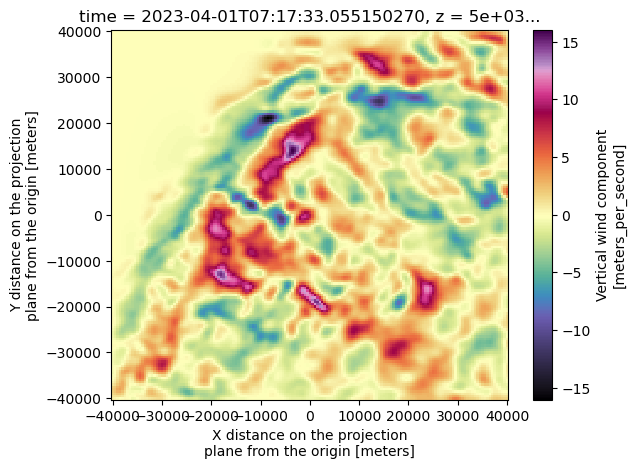

In [29]:
ds["vertical_wind_component"].isel(time=0).sel(z=5000, method="nearest").plot(cmap="ChaseSpectral")

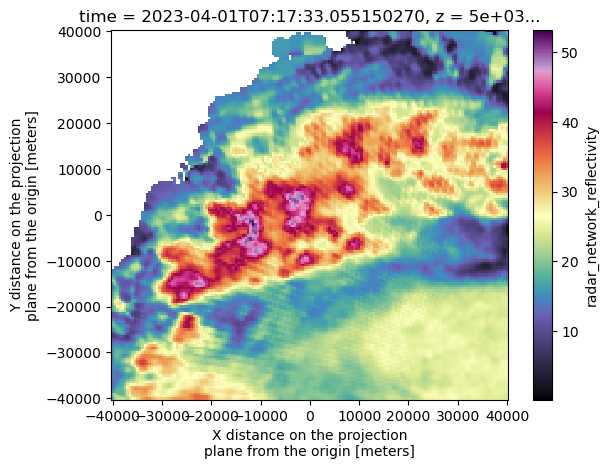

In [30]:
ds["radar_network_reflectivity"].isel(time=0).sel(z=5000, method="nearest").plot(cmap="ChaseSpectral")

In [31]:
# there seems to be a updraft at -5000 distance 

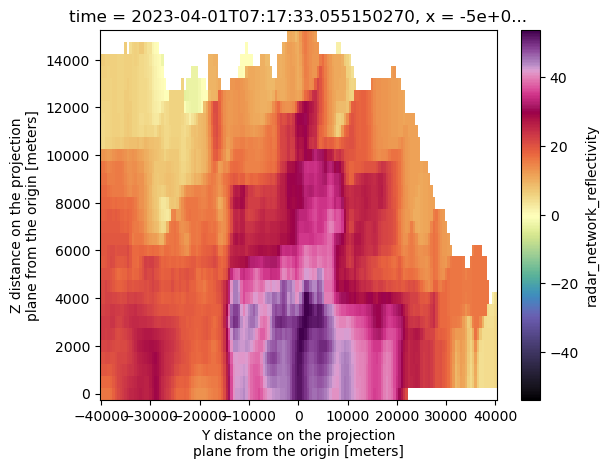

In [32]:
ds["radar_network_reflectivity"].isel(time=0).sel(x=-5000, method="nearest").plot(cmap="ChaseSpectral")

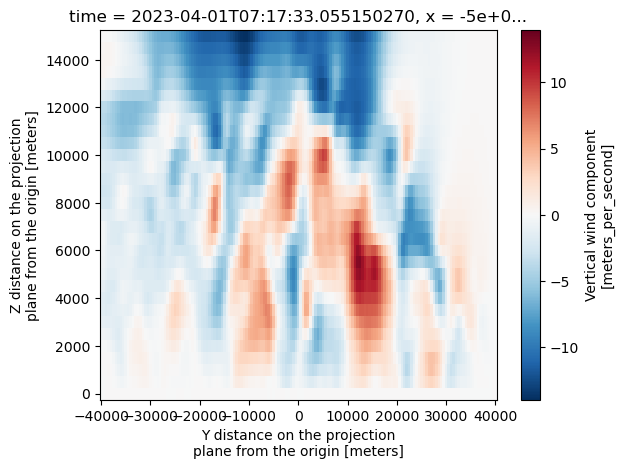

In [34]:
ds["vertical_wind_component"].isel(time=0).sel(x=-5000, method="nearest").plot()

In [ ]:
#